# Численные методы. Лабораторная работа №8. Косолапов И. ПМ-31

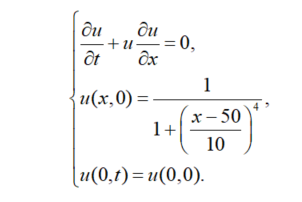

Для расчета квазилинейного уравнения воспользуемся консервативной чисто неявной схемой
\begin{equation}
\\ \frac {u_n(k+1) + u_n(k)}{\tau} + \frac{u^2_n(k+1) - u^2_{n-1}(k+1)}{2h} = 0 
\end{equation}

Для того, чтобы выделить $u_n(k+1)$ необходимо решить квадратное уравнение и отбросить отрицательный корень
\begin{equation}
\\ u_n(k+1) = \sqrt{\frac{h^2}{\tau^2} + \frac{2h}{\tau}u_n(k) + u^2_{n-1}(k+1)} - \frac{h}{\tau}
\end{equation}

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import moviepy.editor as mpy

In [2]:
def mu(x):
    return 1/(1+((x-50)/10)**4)

In [4]:
tau, h = 0.05, 1
def initialization(tau,h):
    x = np.array([i for i in np.arange(0, 100+h, h)])
    t = np.array([i*tau for i in range(1000)])
    U = np.zeros((len(t), len(x)))
    U[0] = mu(x)
    a = np.zeros(len(t))
    U[:,0] = mu(a)
    return x, t, U

In [5]:
x, t, U  = initialization(tau, h)

In [11]:
for n in range(1, len(x)):
    for k in range(0, len(t)-1):
        U[k+1][n] = ((h/tau)**2 + 2*h/tau * U[k][n] + U[k+1][n-1]**2)**(1/2) - h/tau

In [49]:
import tqdm

100%|██████████| 100/100 [00:06<00:00, 15.54it/s]


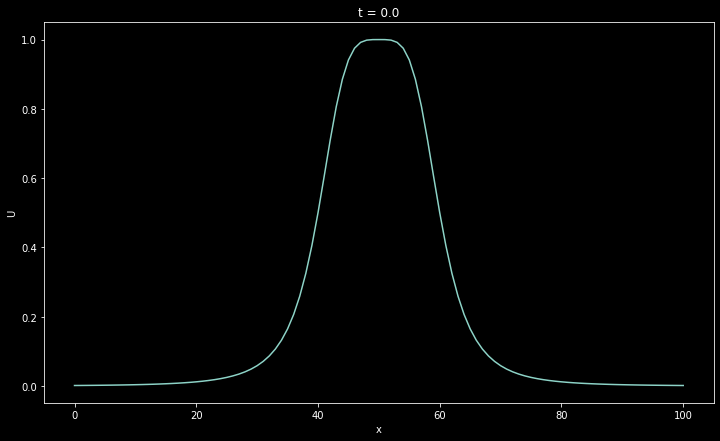

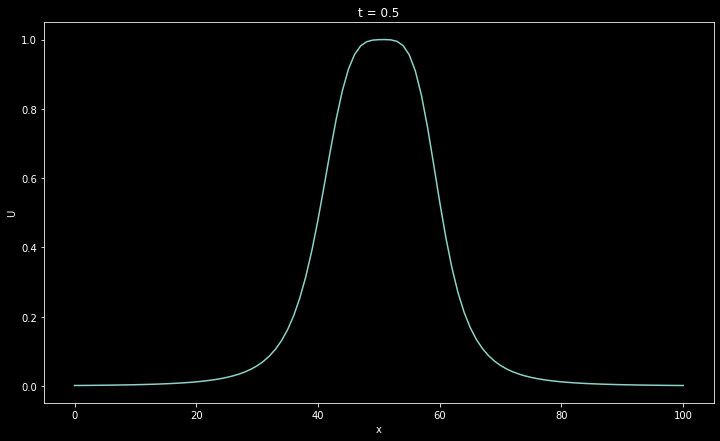

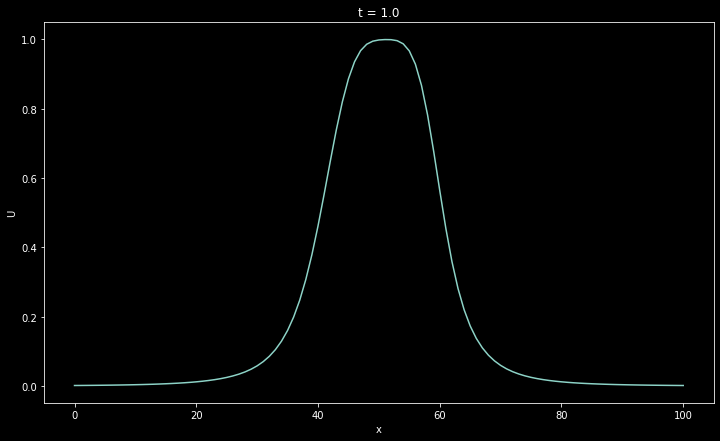

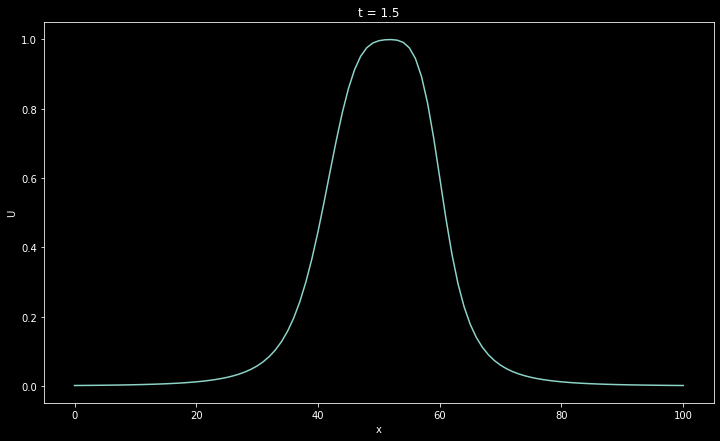

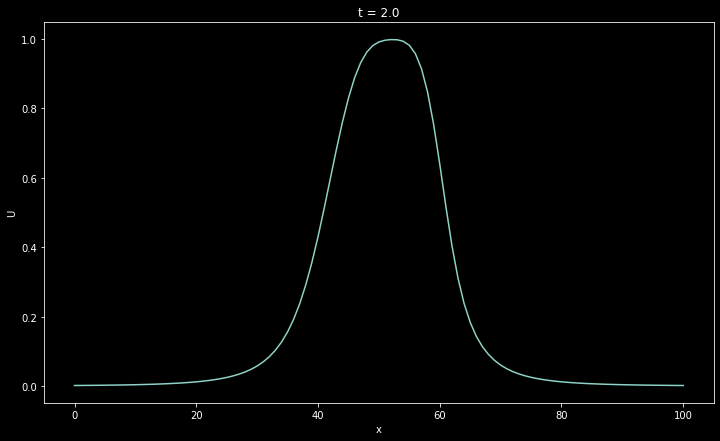

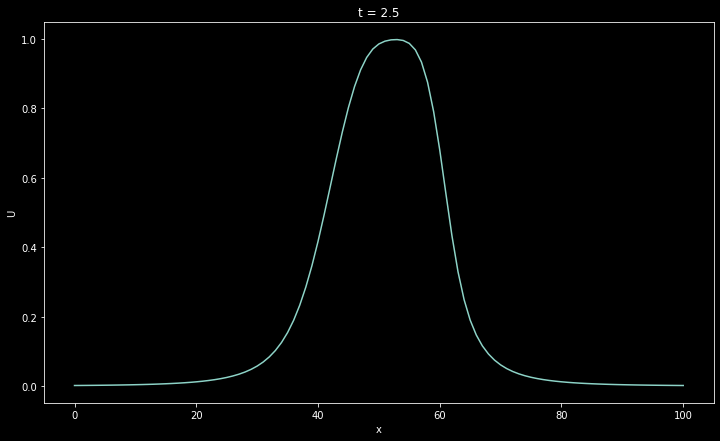

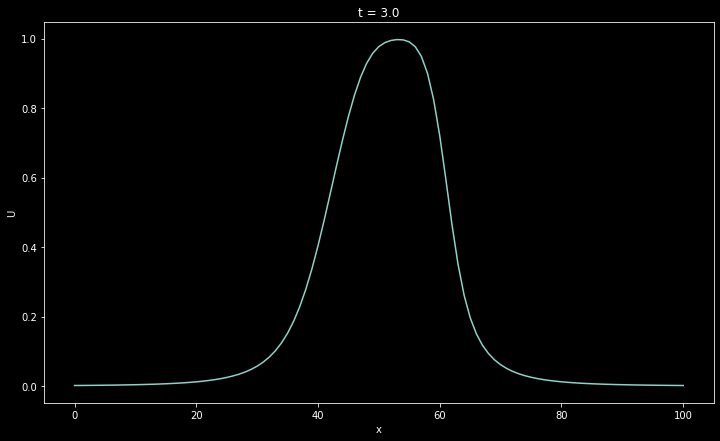

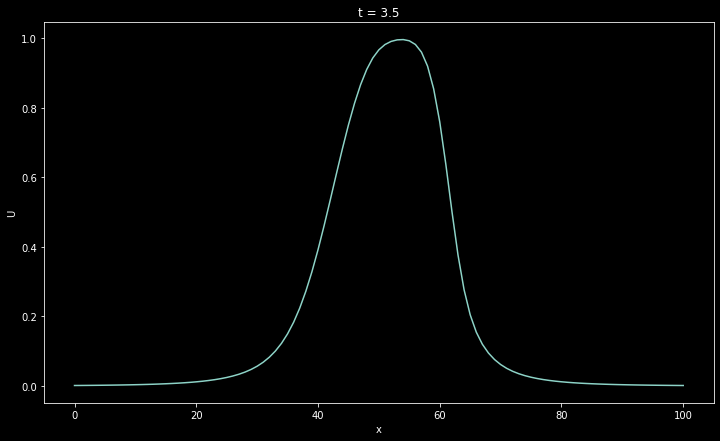

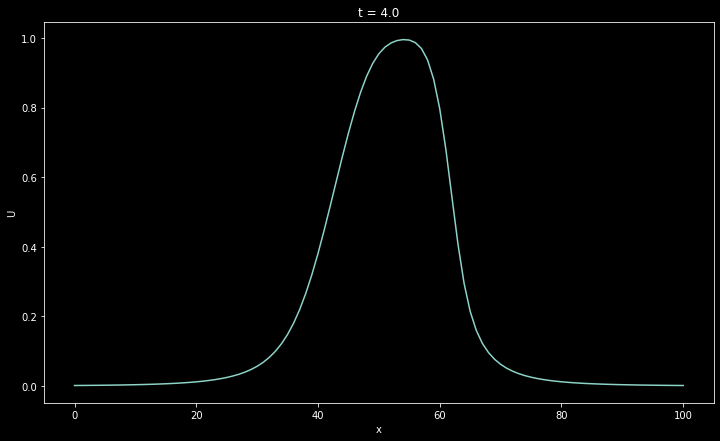

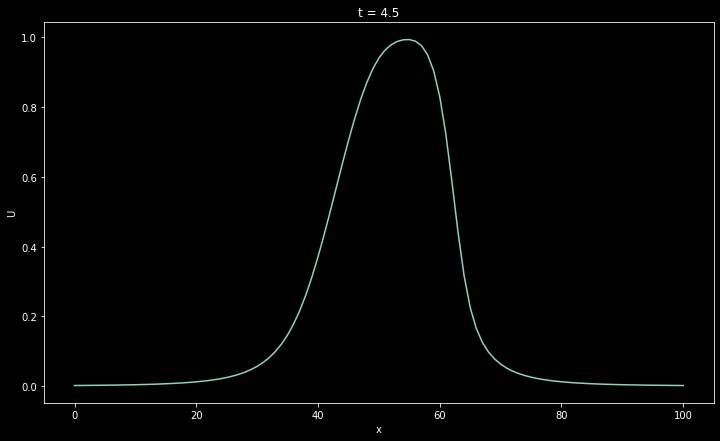

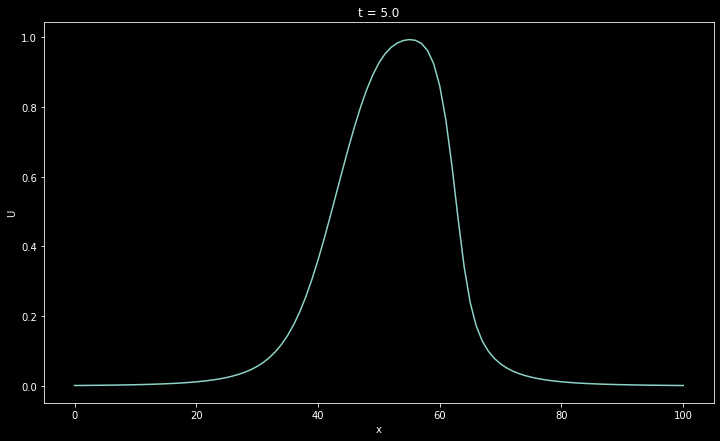

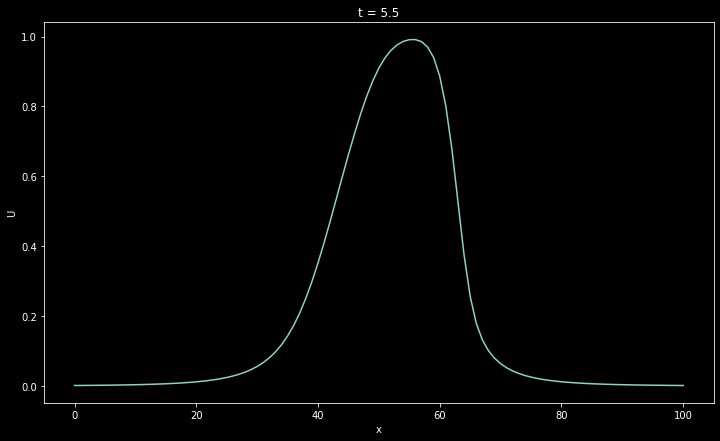

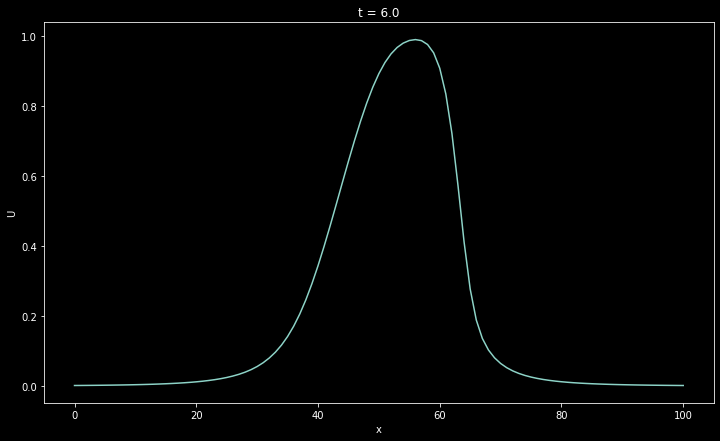

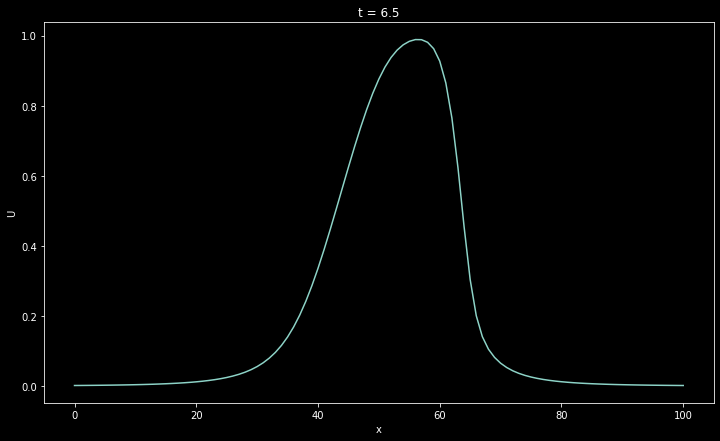

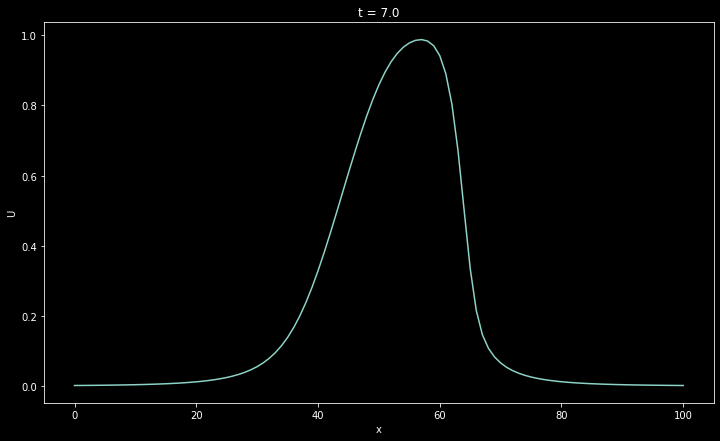

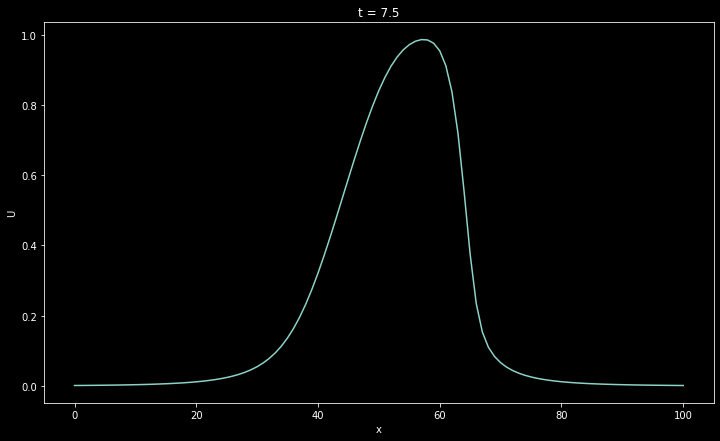

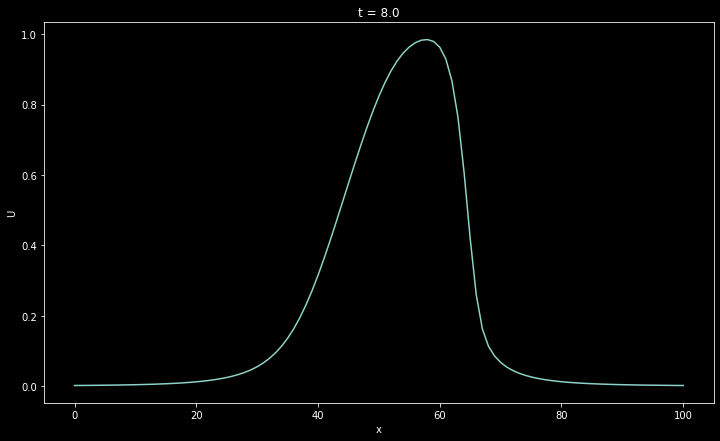

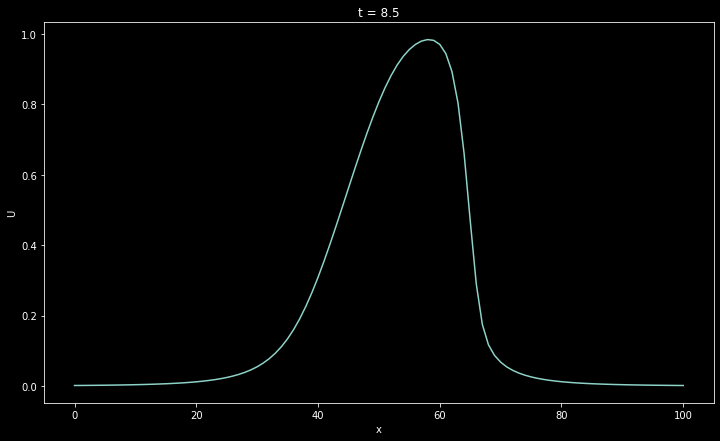

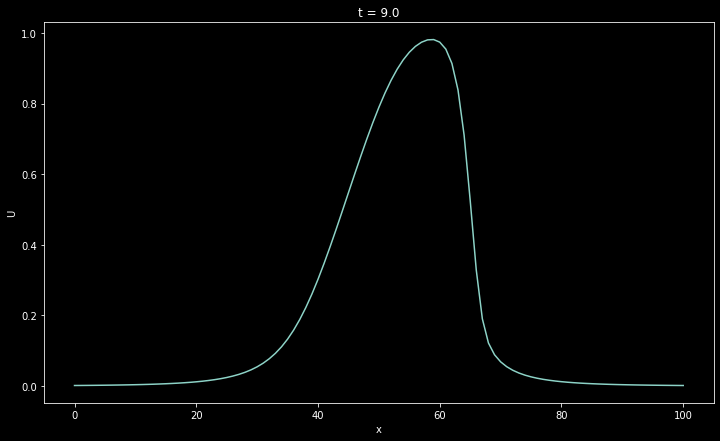

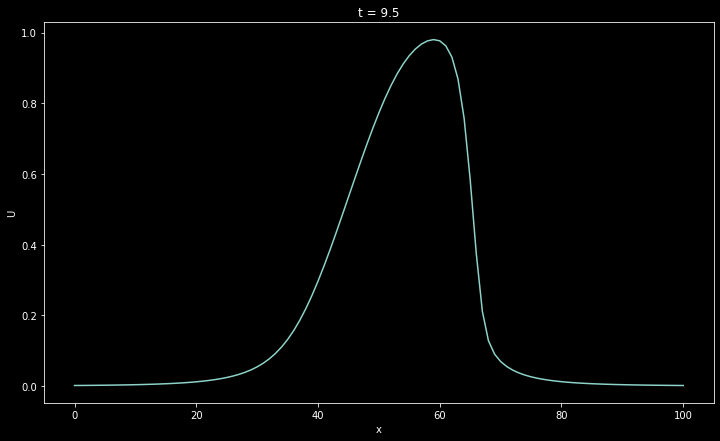

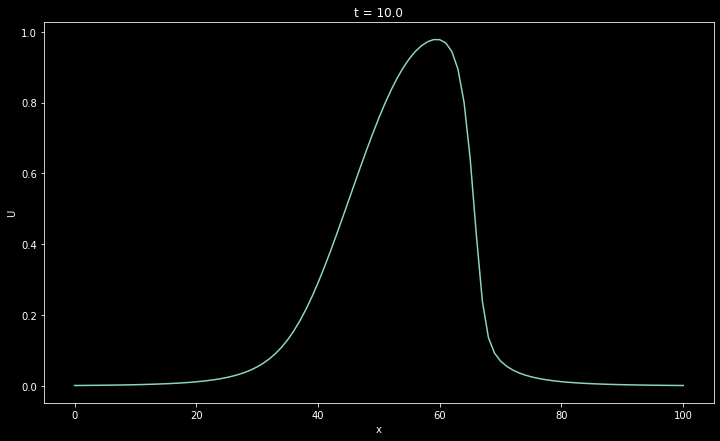

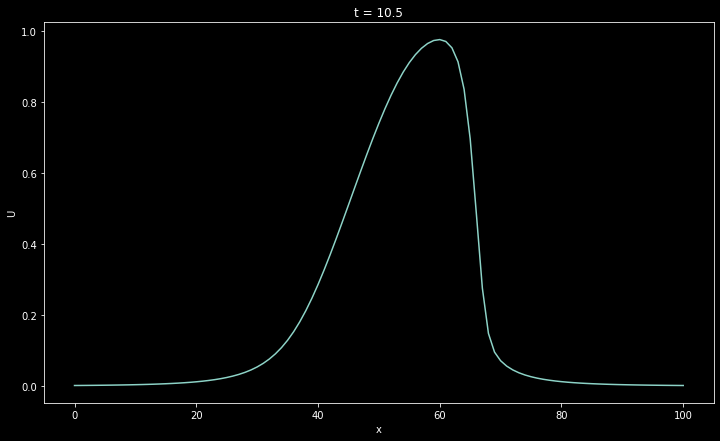

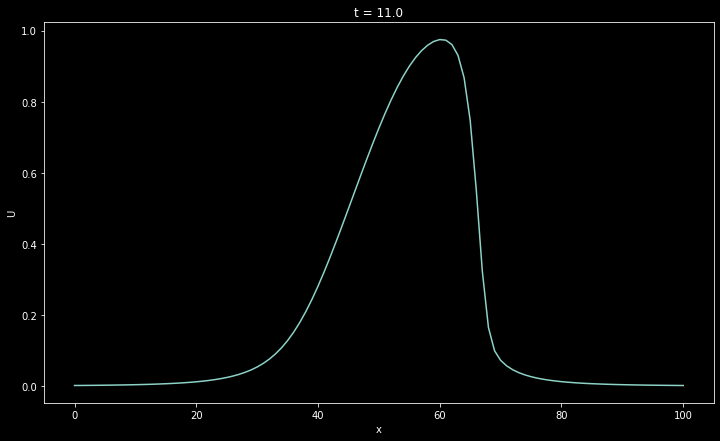

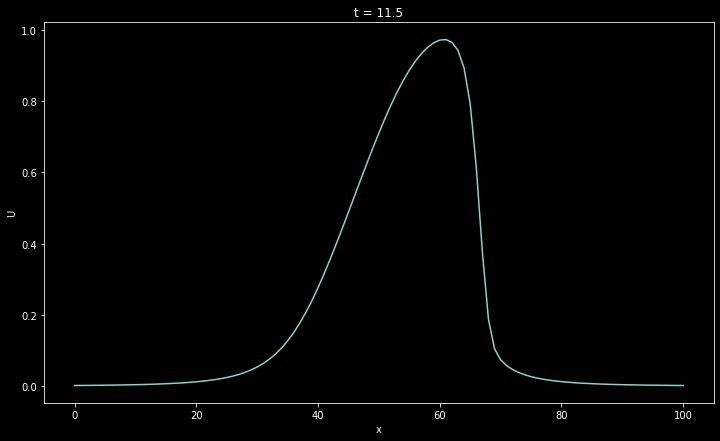

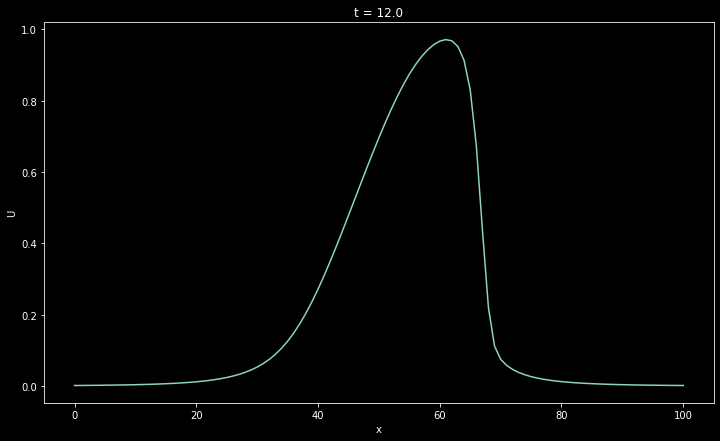

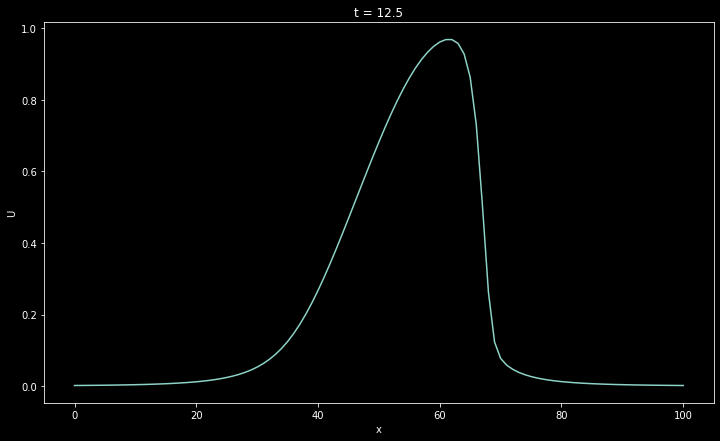

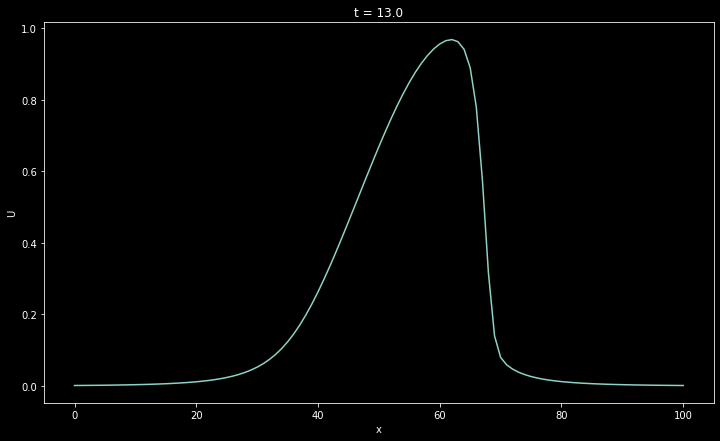

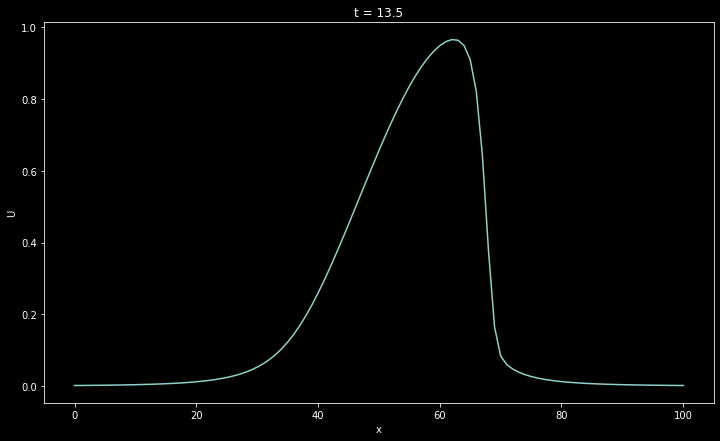

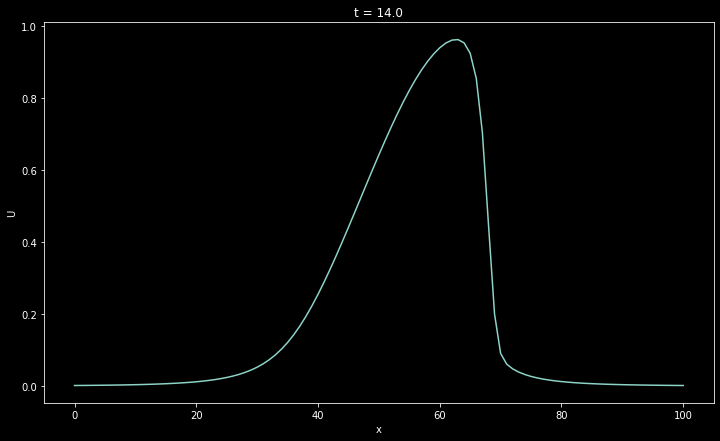

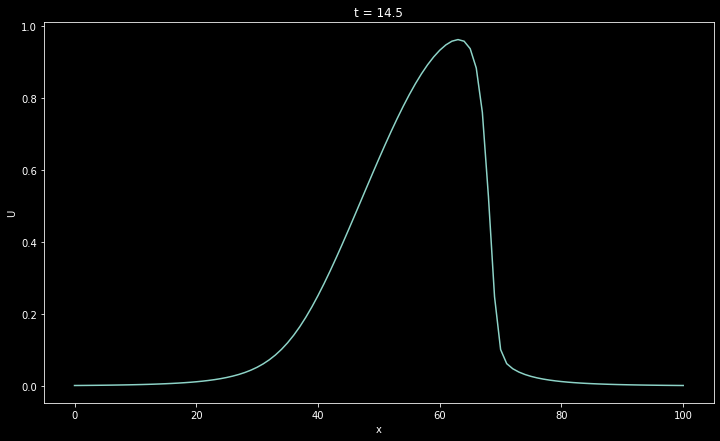

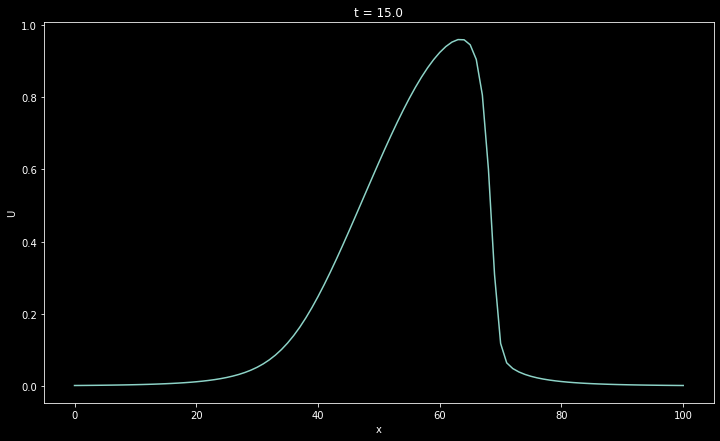

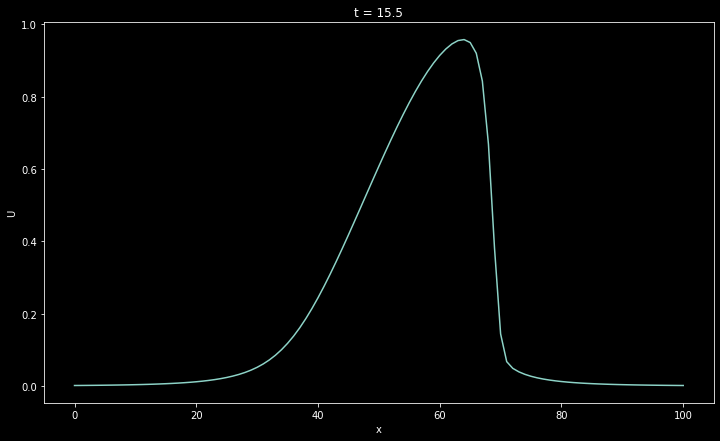

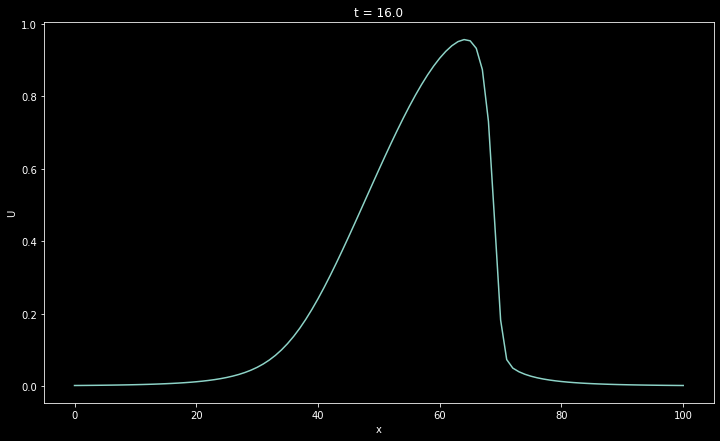

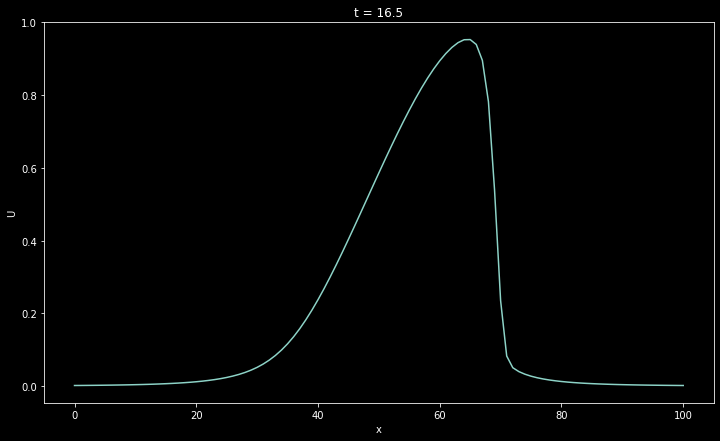

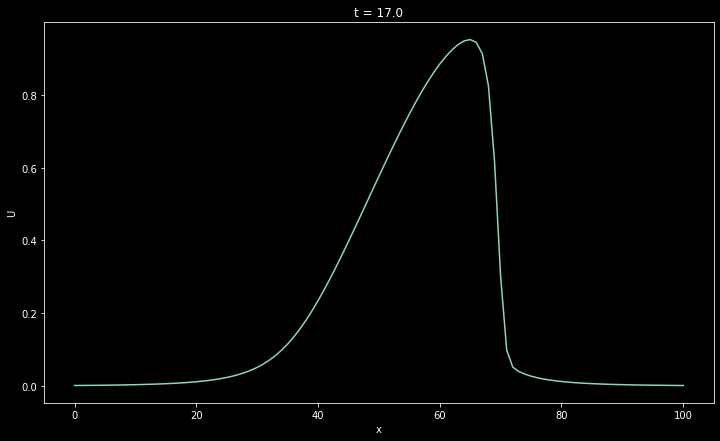

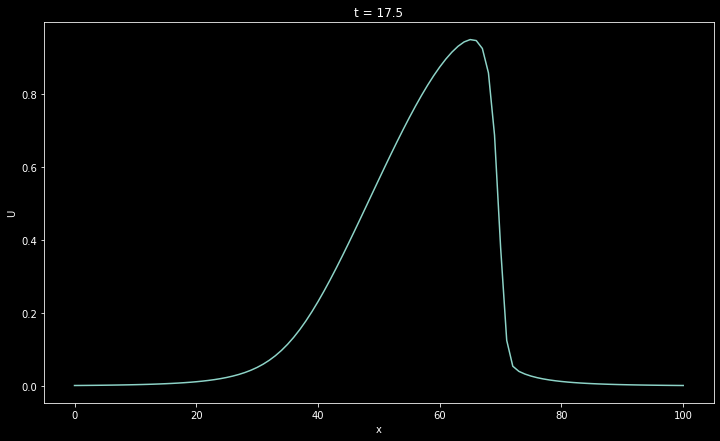

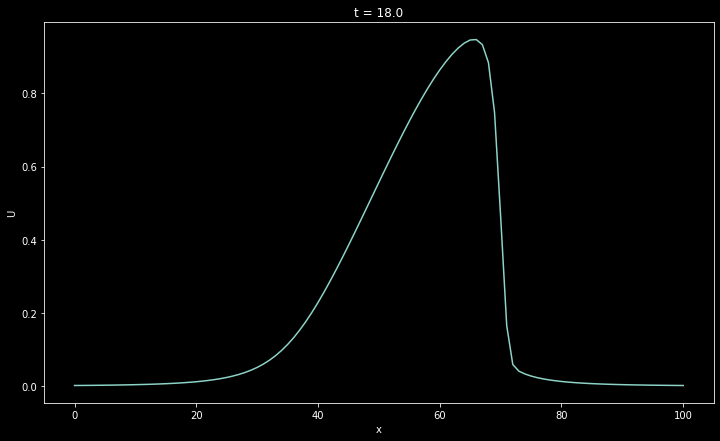

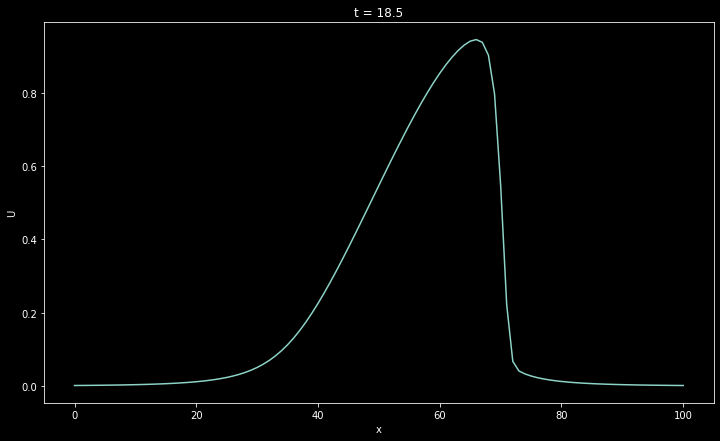

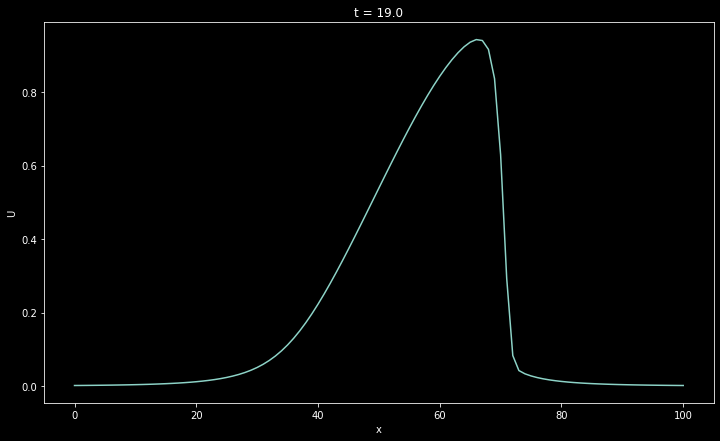

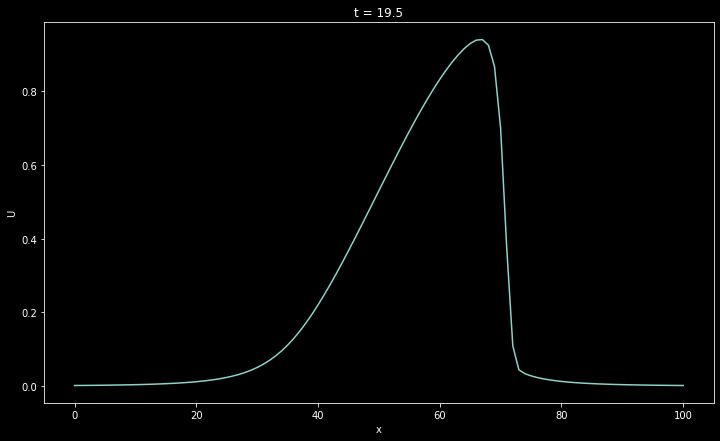

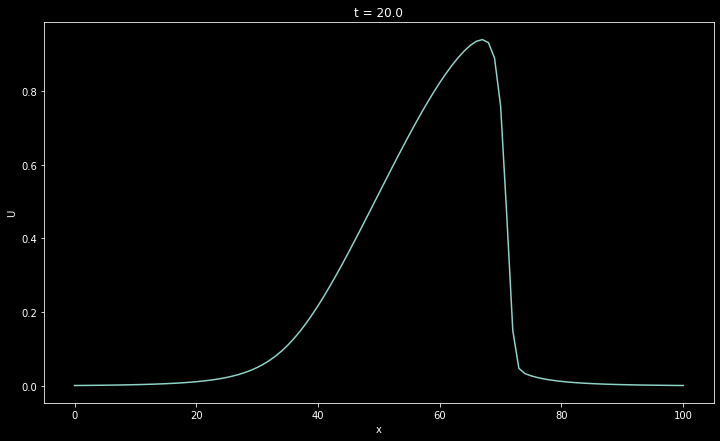

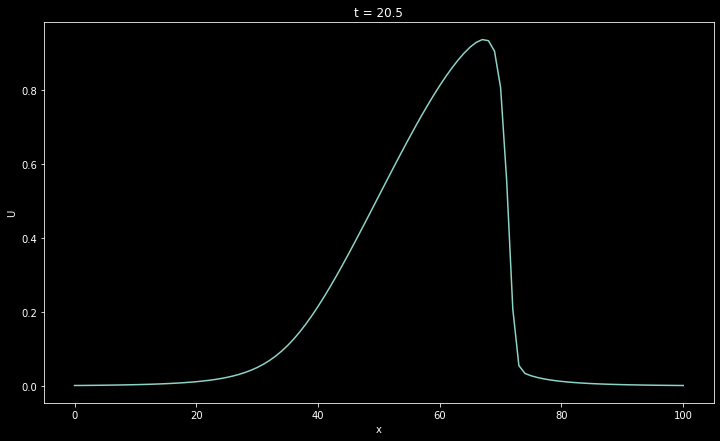

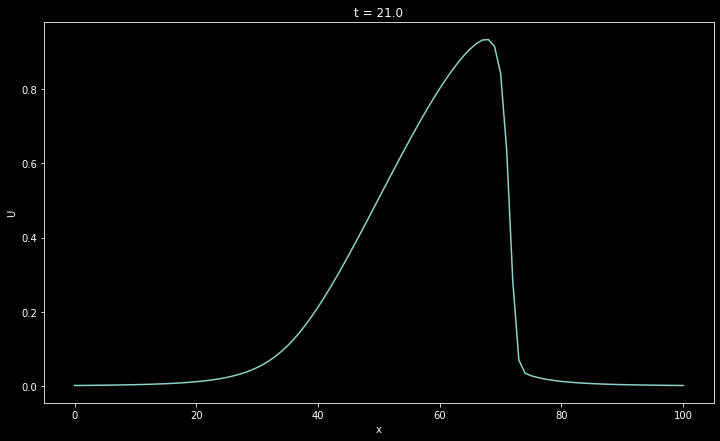

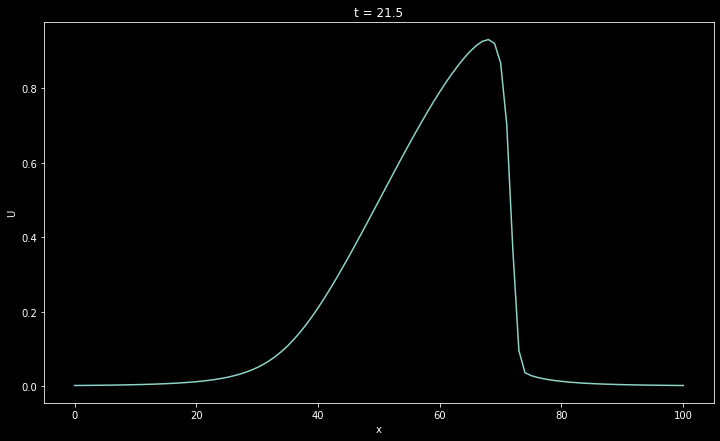

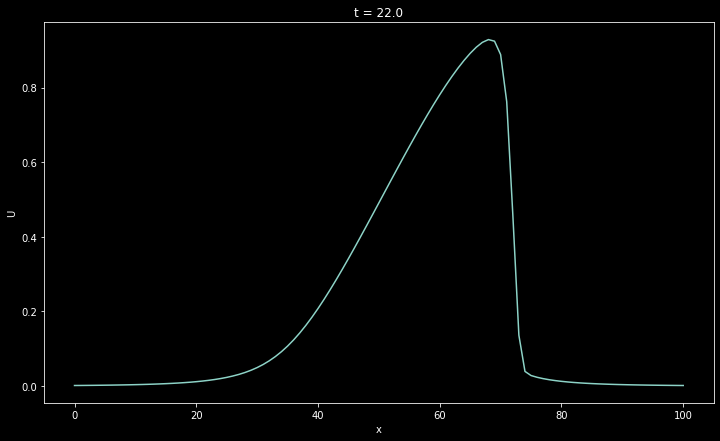

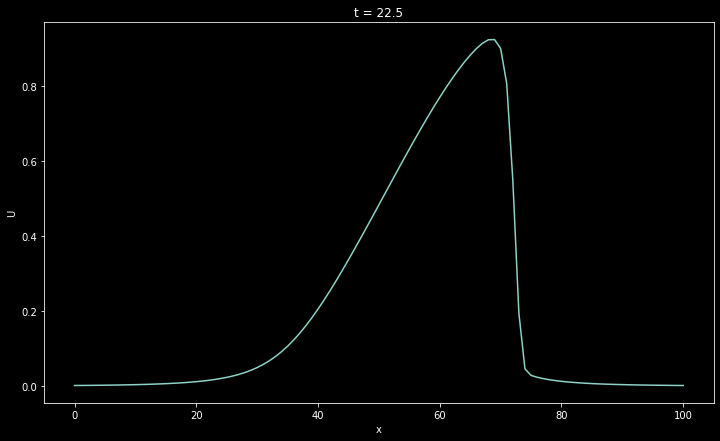

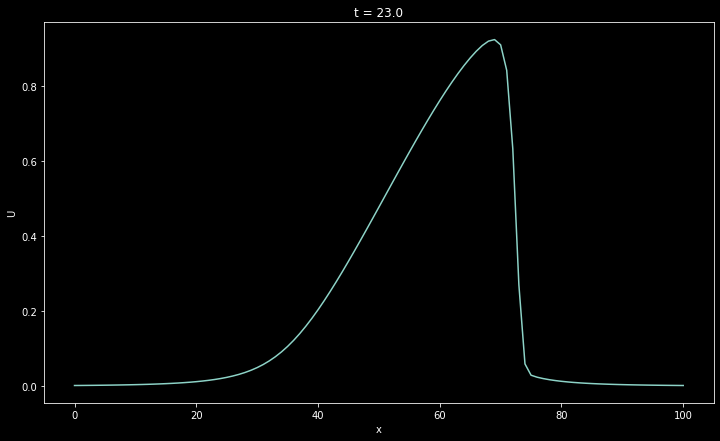

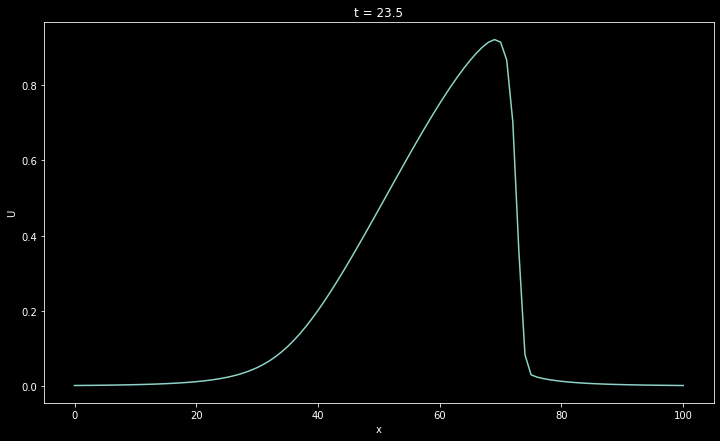

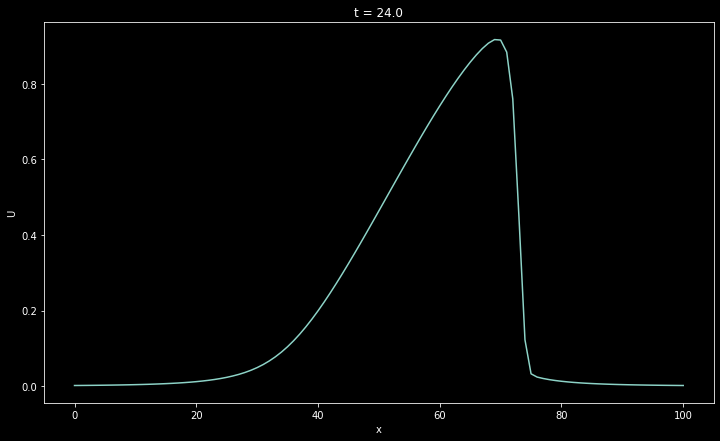

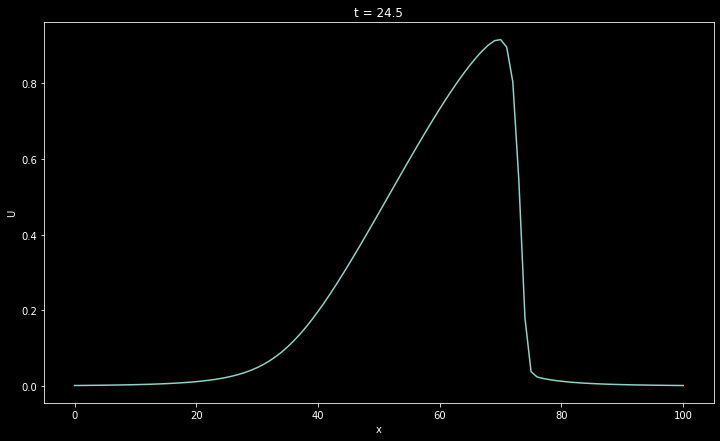

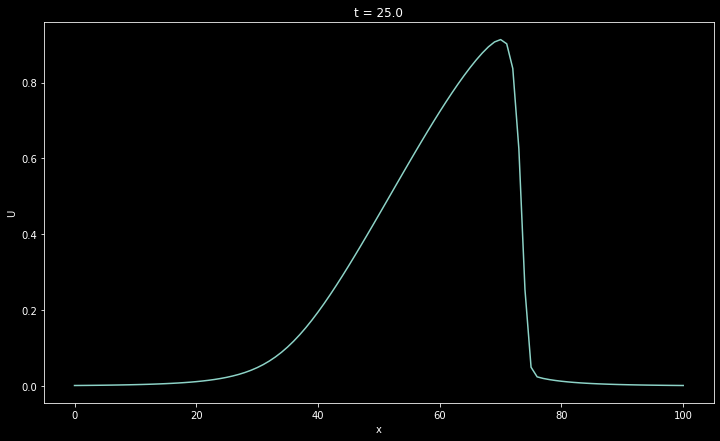

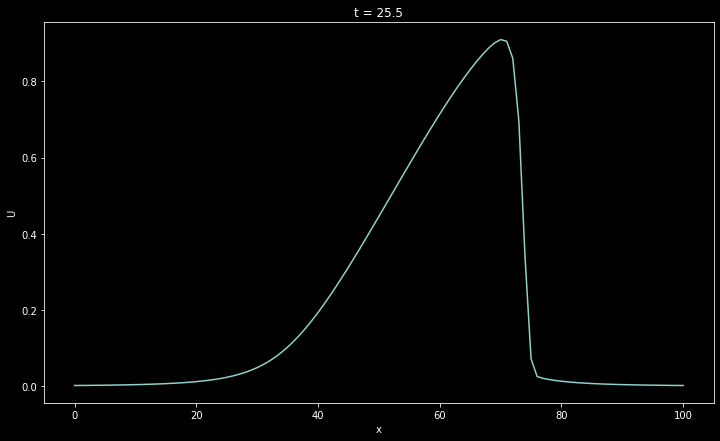

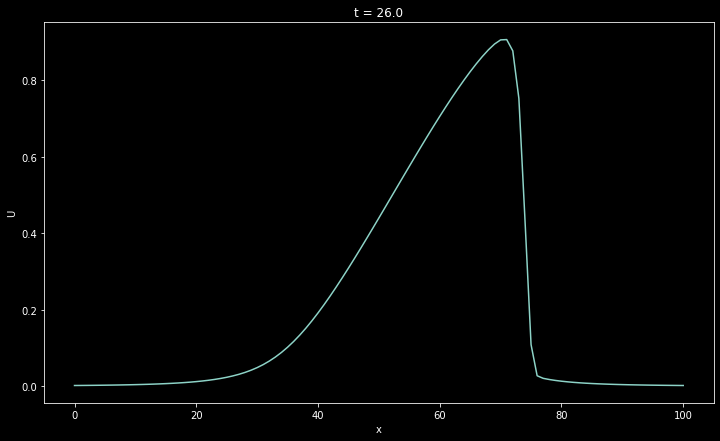

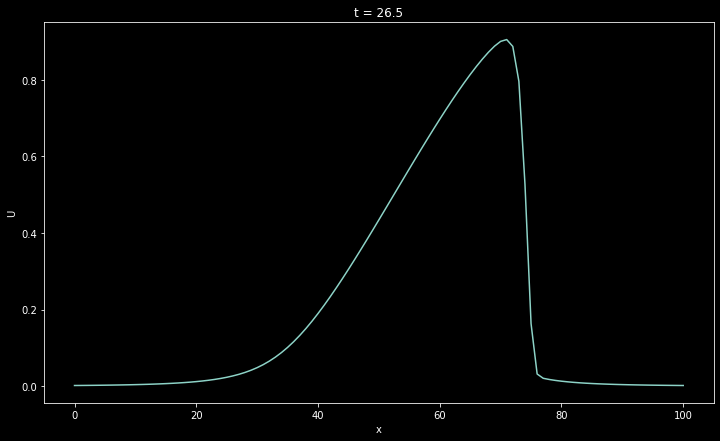

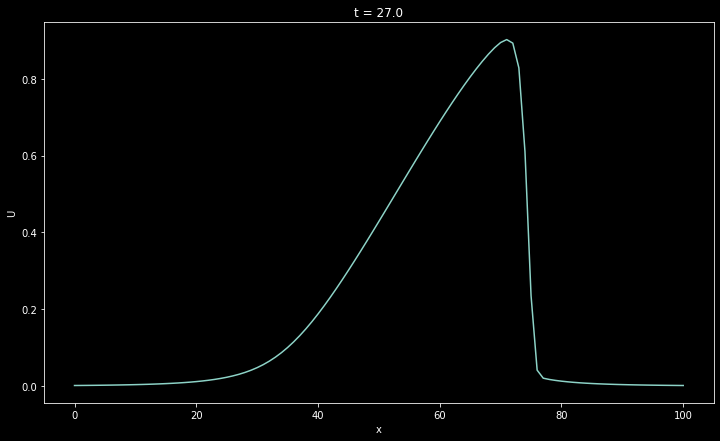

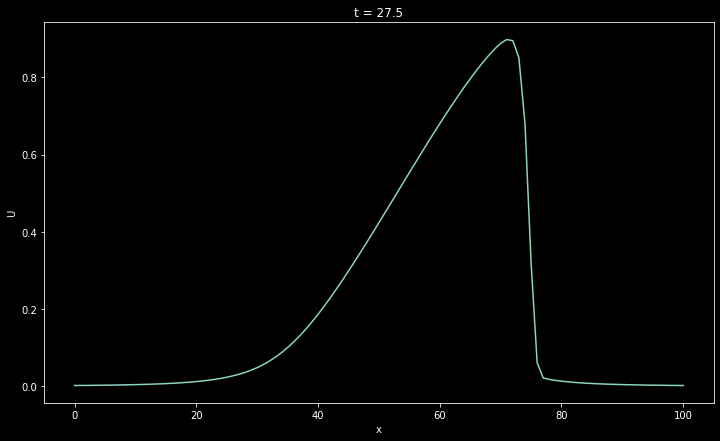

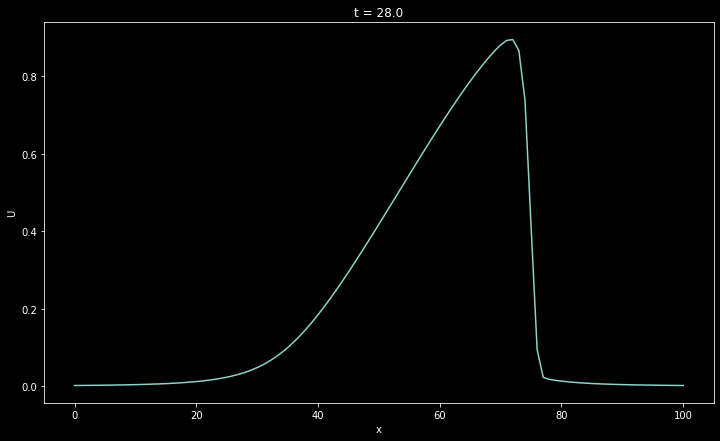

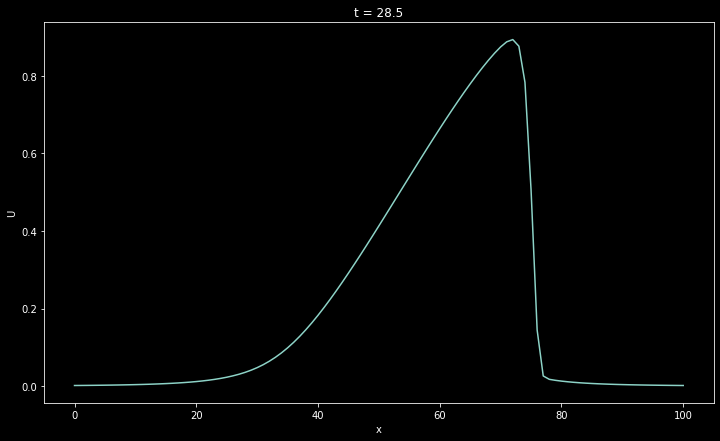

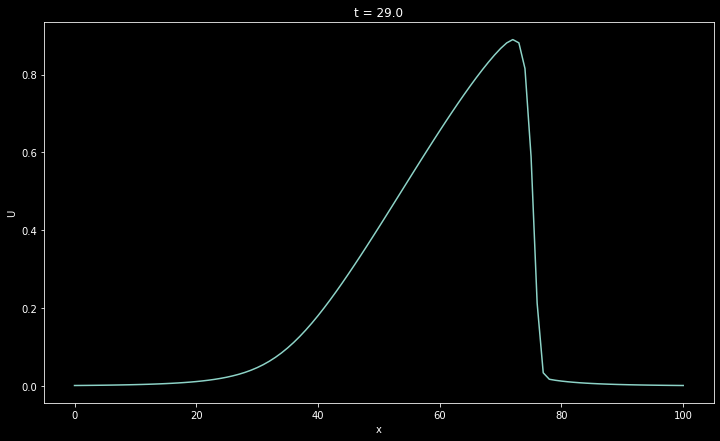

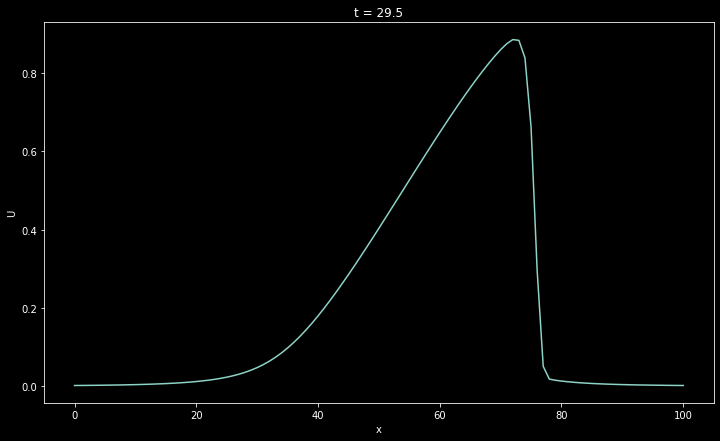

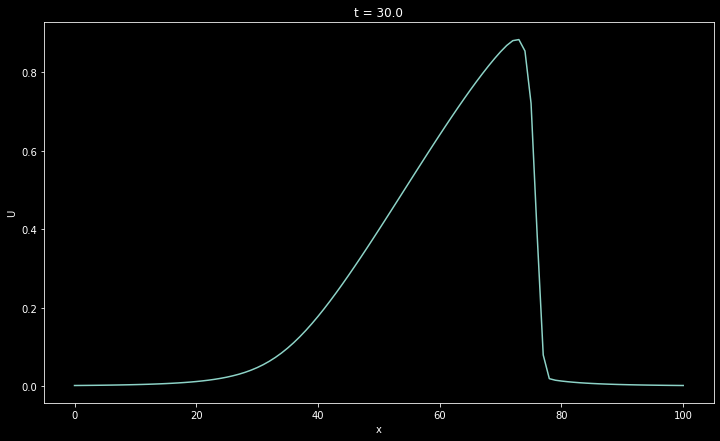

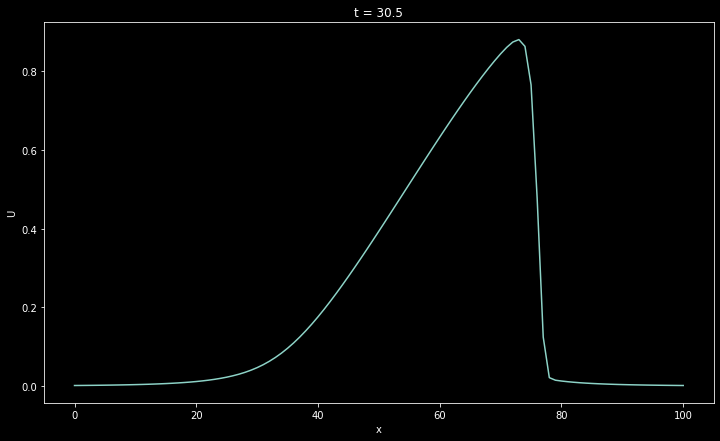

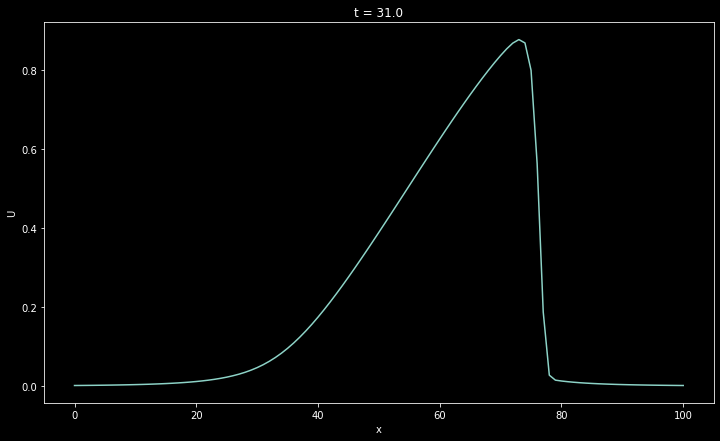

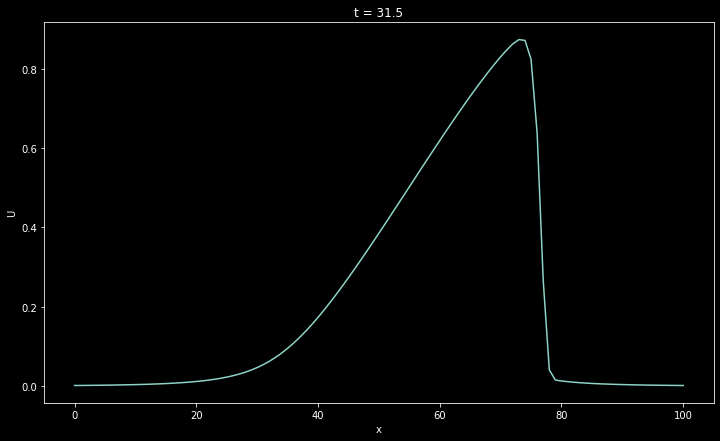

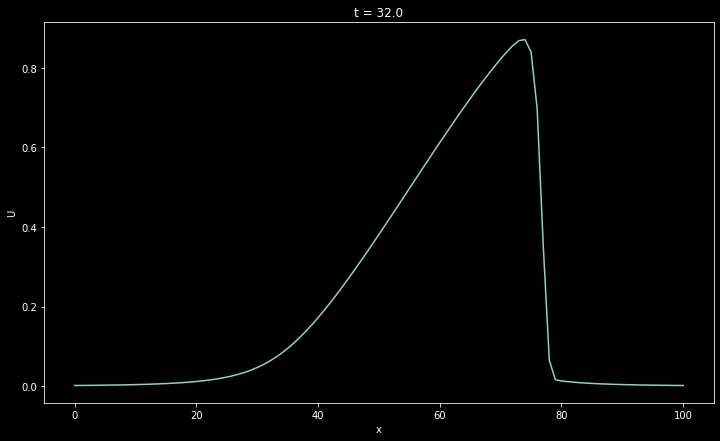

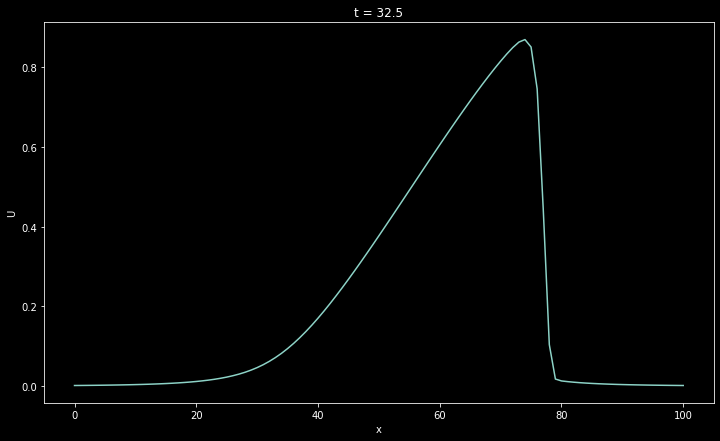

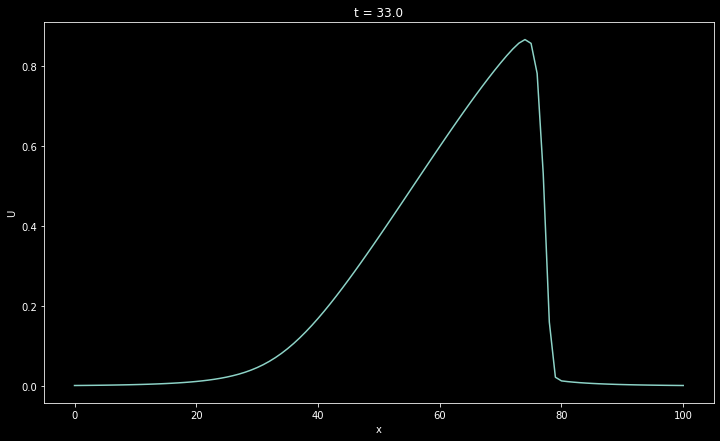

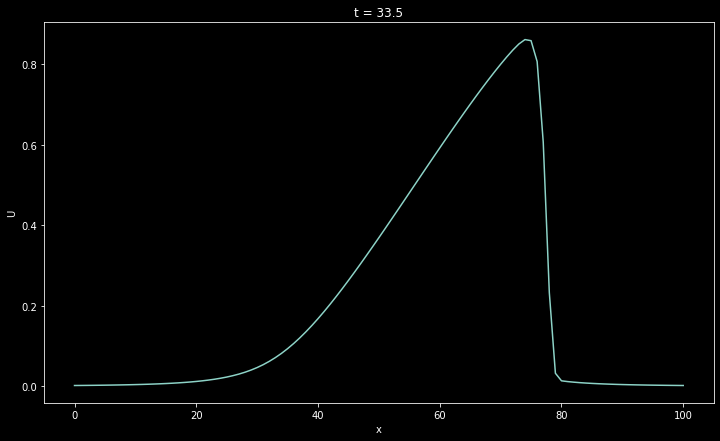

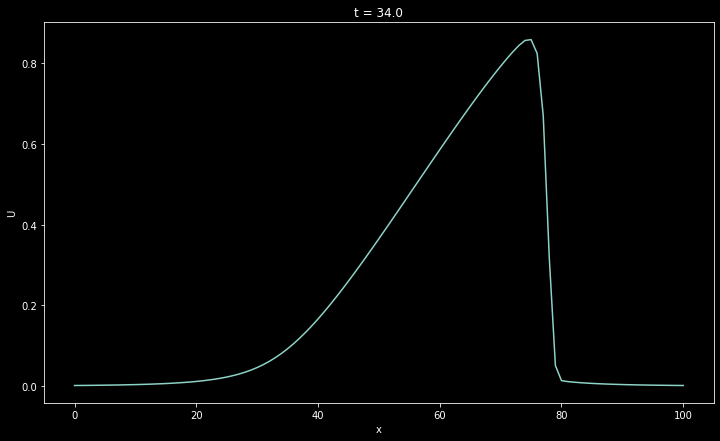

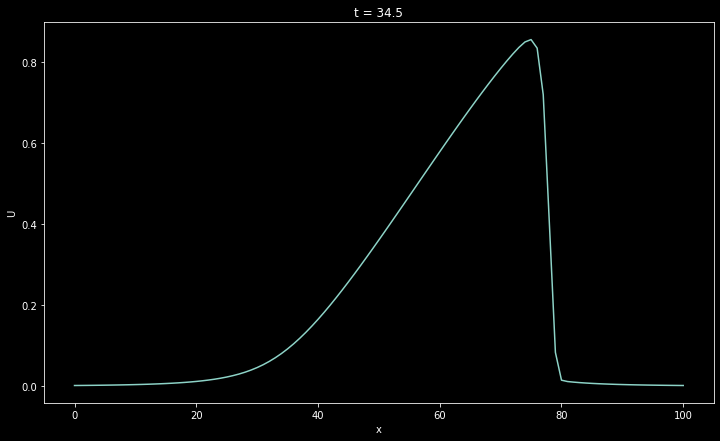

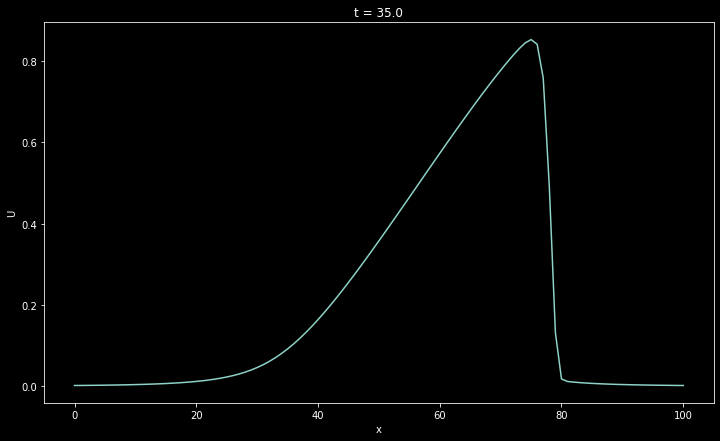

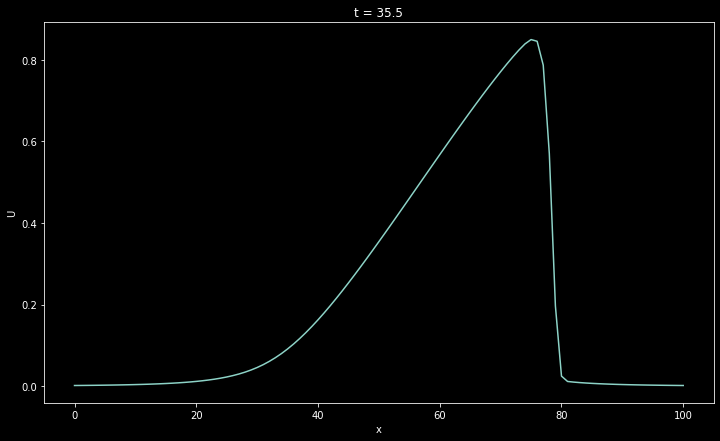

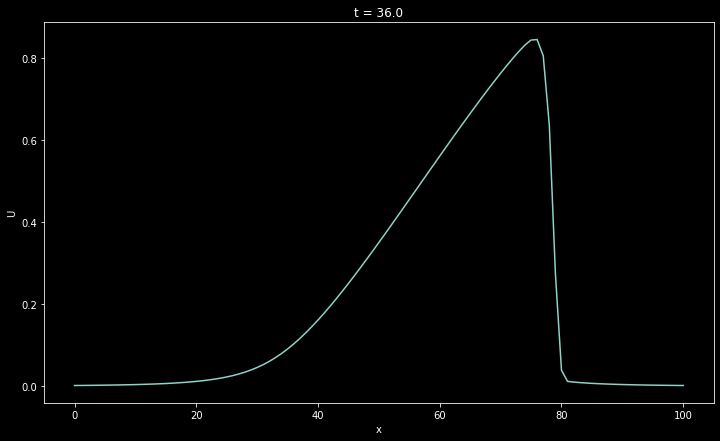

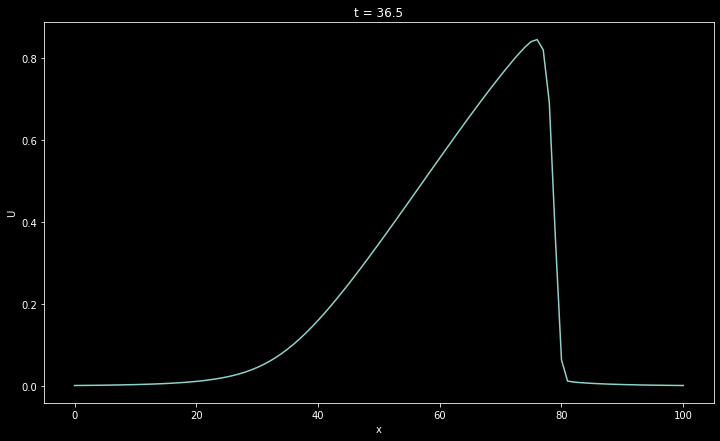

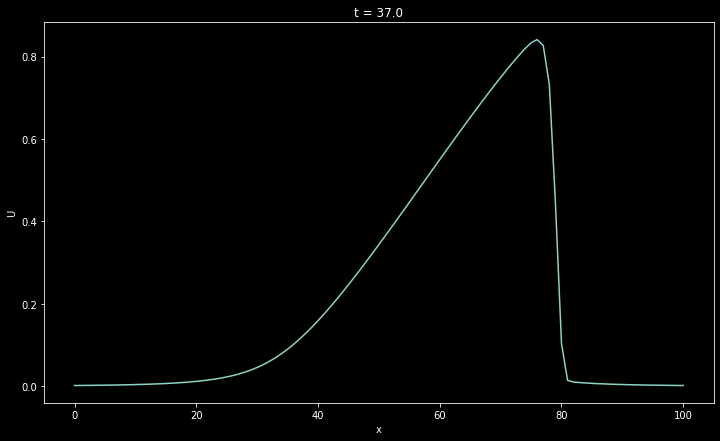

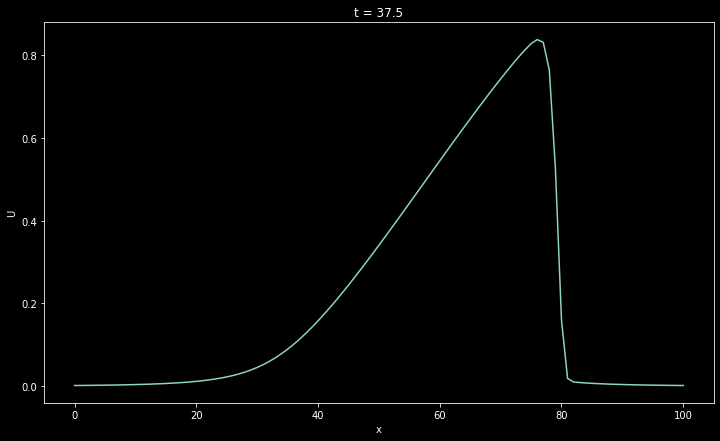

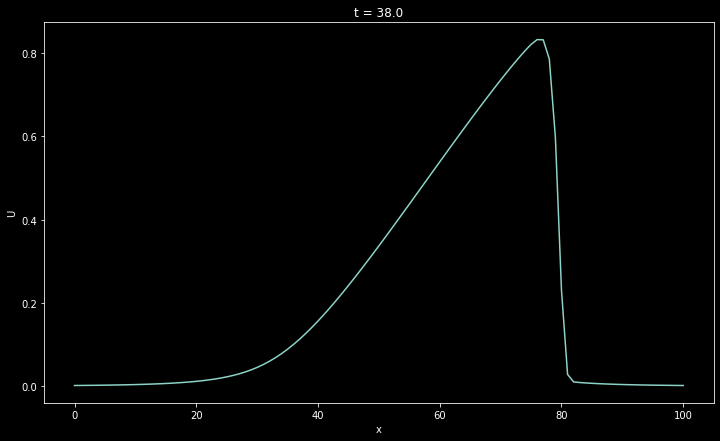

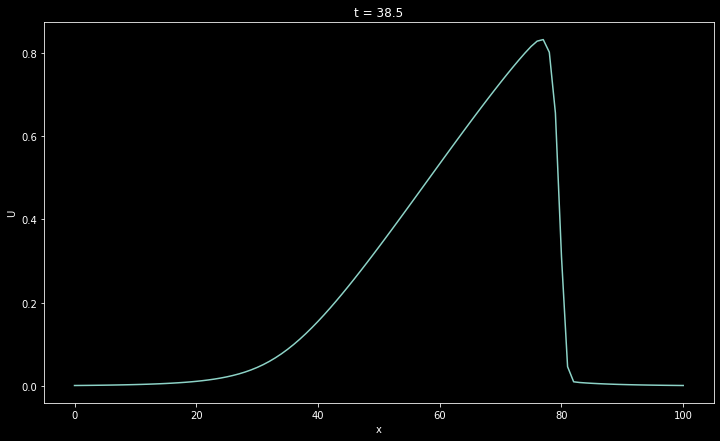

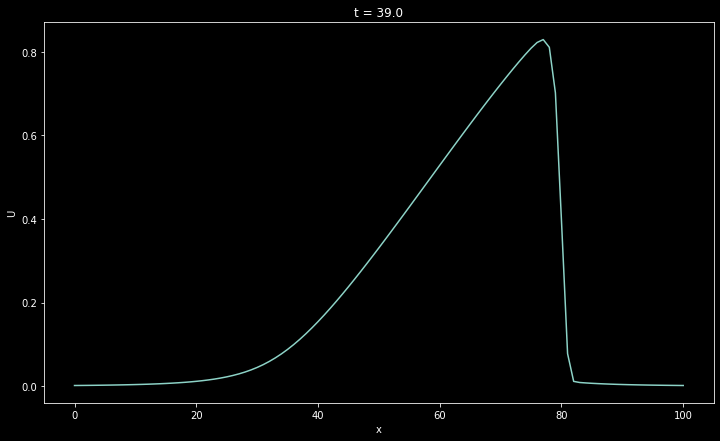

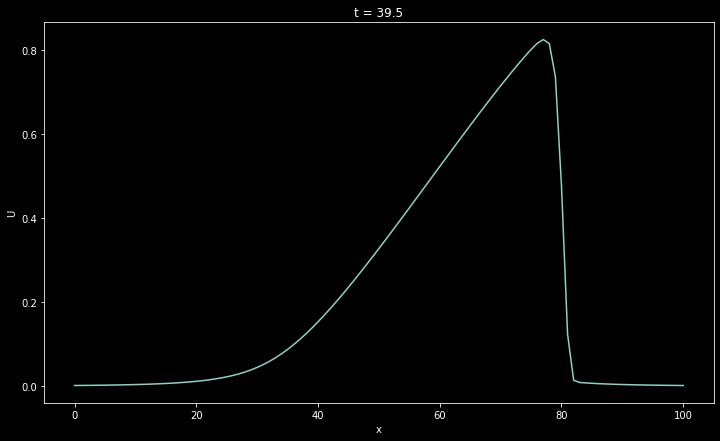

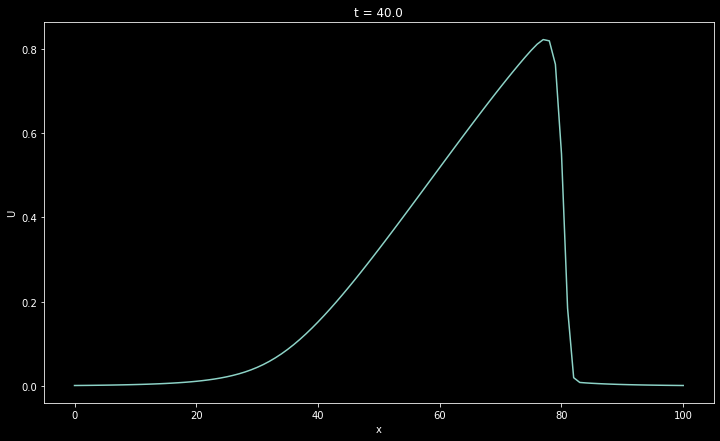

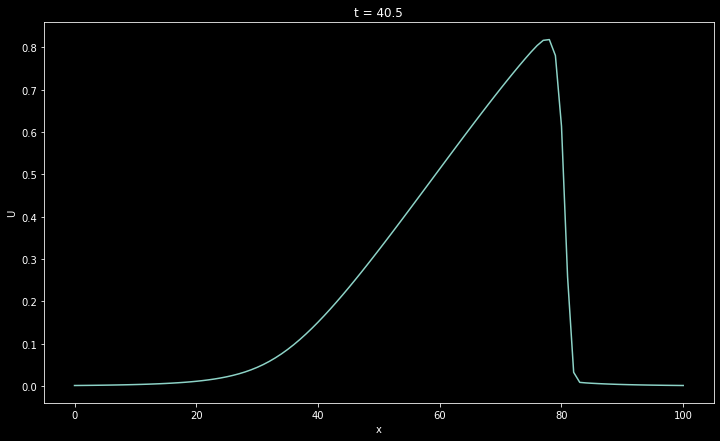

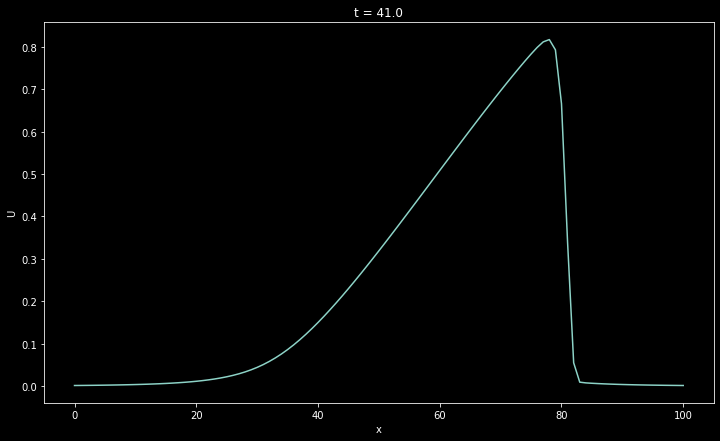

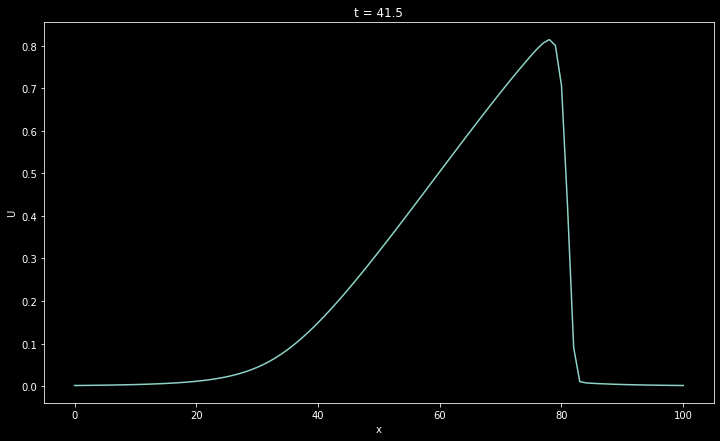

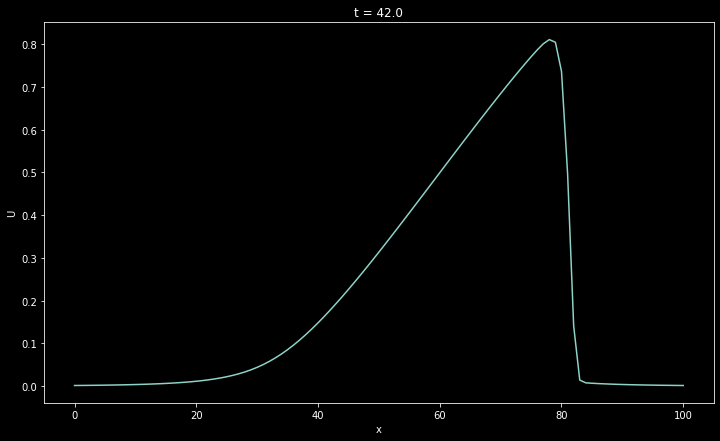

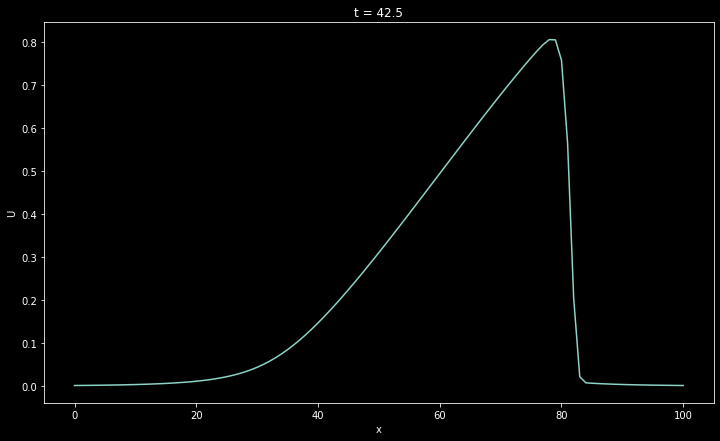

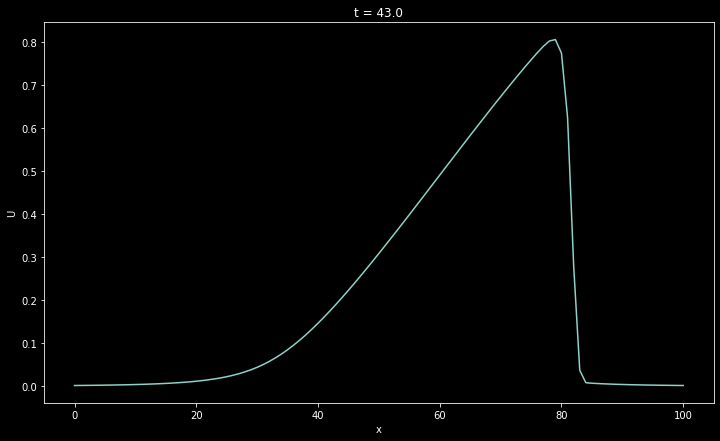

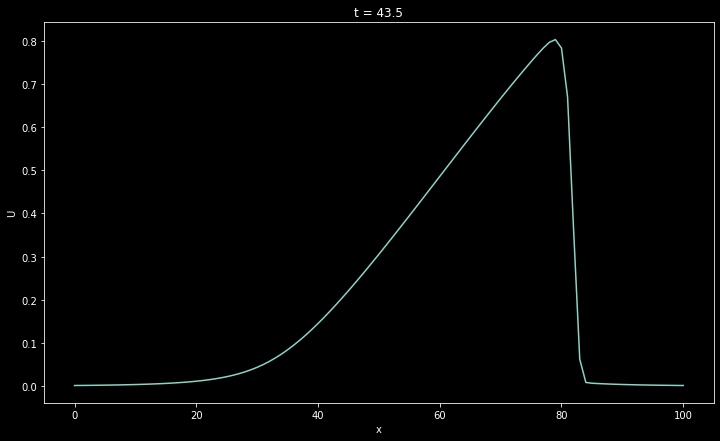

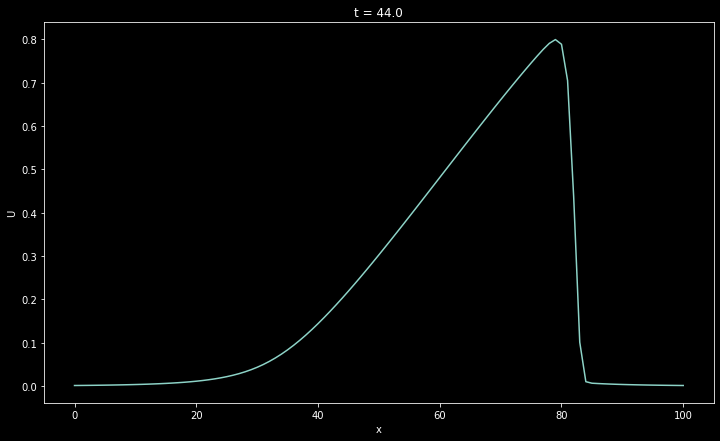

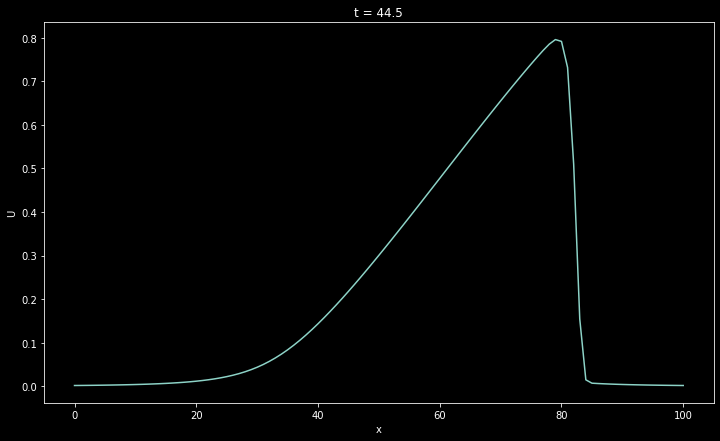

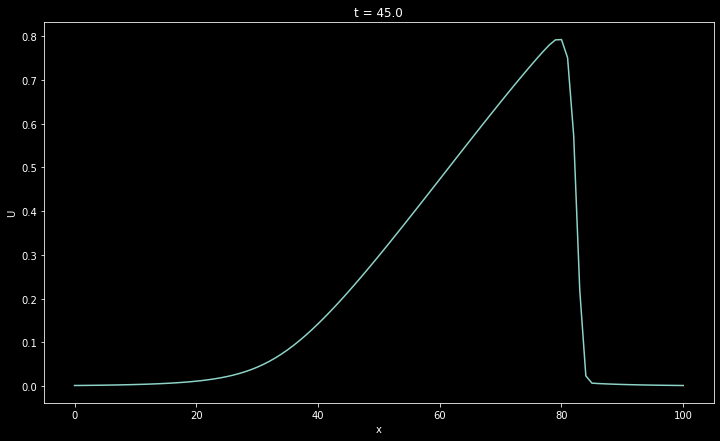

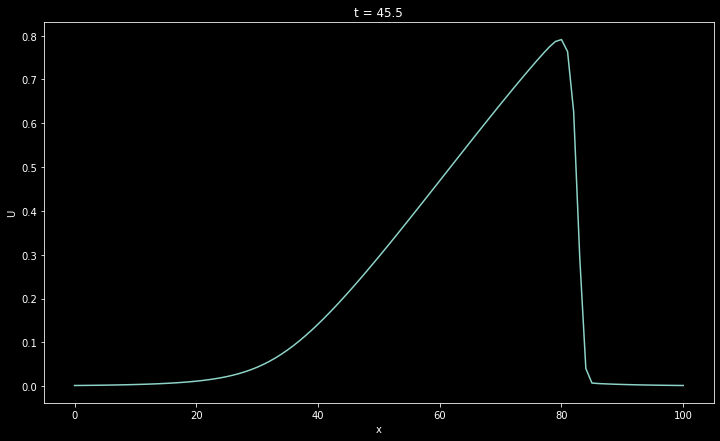

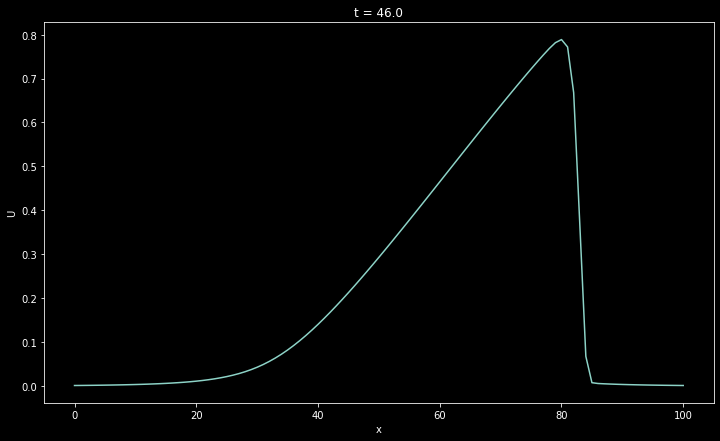

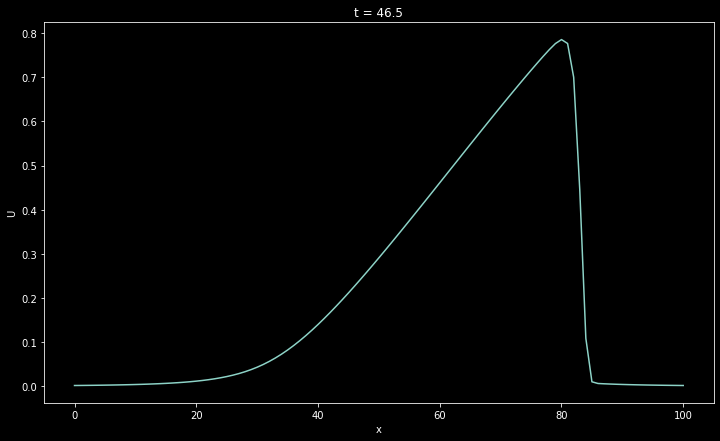

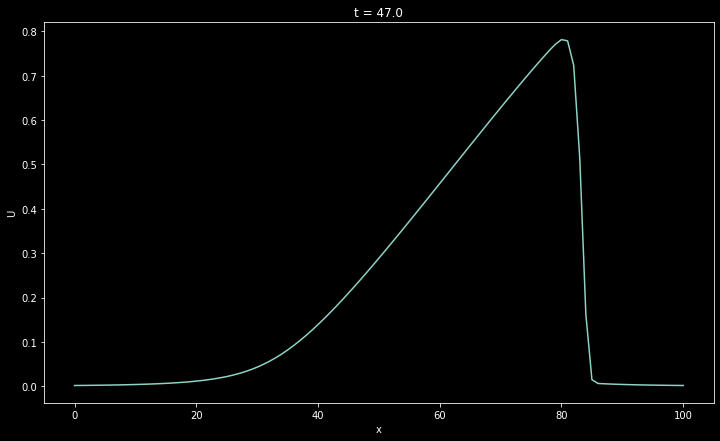

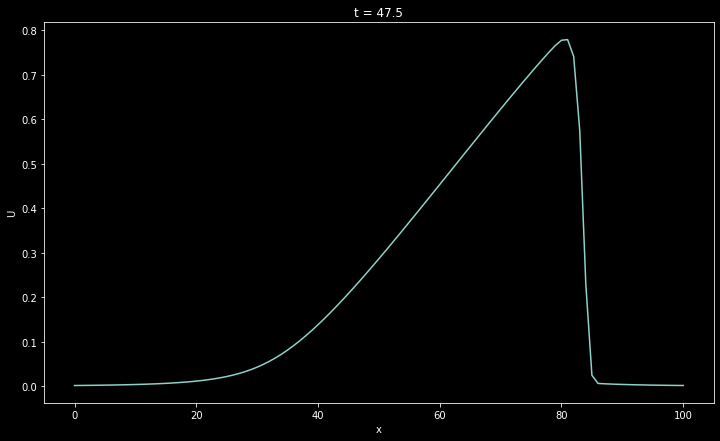

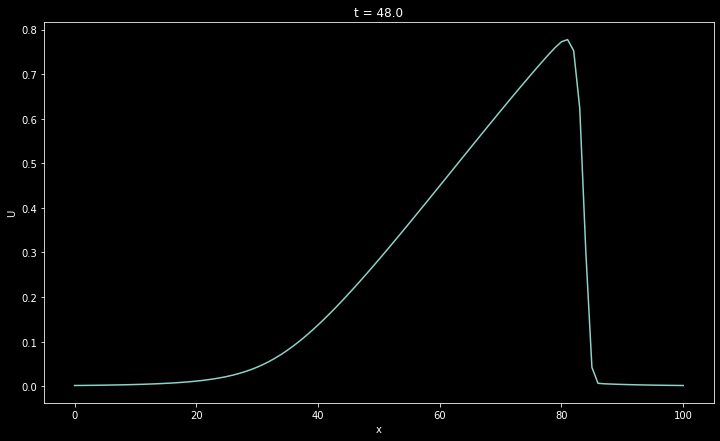

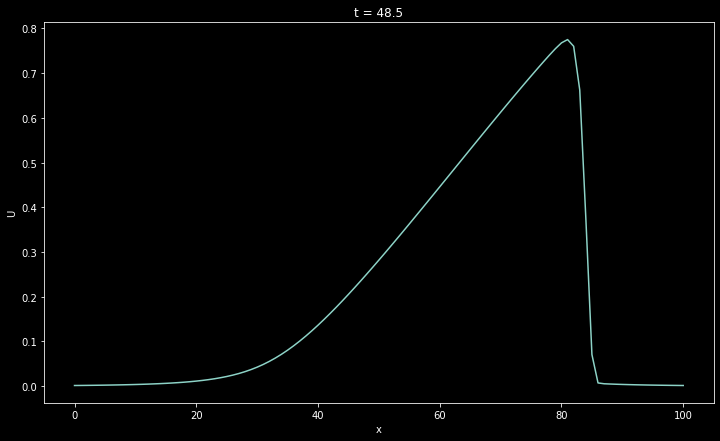

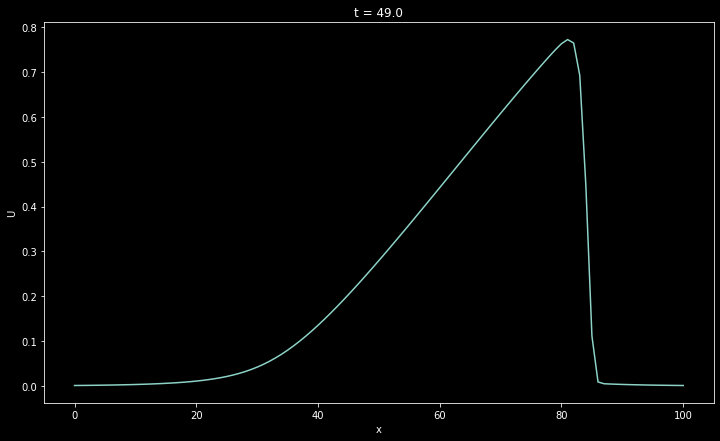

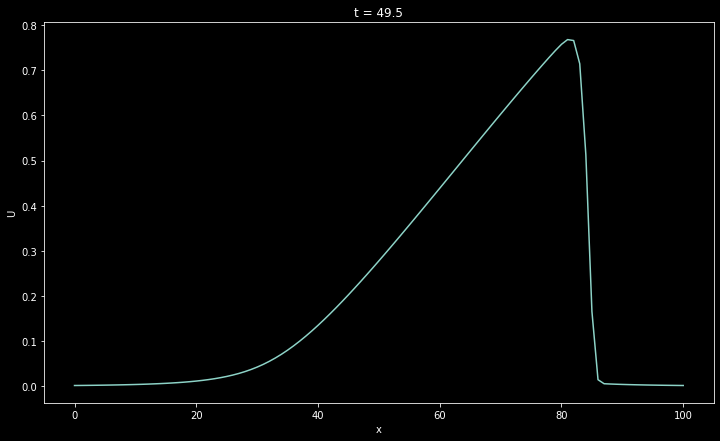

In [51]:
plt.style.use('dark_background')
for i in tqdm.tqdm(range(0,len(t), 10)):
    fig, ax = plt.subplots(figsize= (12, 7))
    ax.plot(x, U[i])
    ax.set_xlabel('x')
    ax.set_ylabel('U')
    ax.set_title(f't = {i*tau}')
    fig.savefig(f"./pic/{i}.png")

In [52]:
gif_name = 'quasilinear equation.gif'
fps = 24
file_list = glob.glob('./pic/*')
file_list.sort(key = lambda x: int(x.replace('./pic\\', '').replace('.png', '')))
clip = mpy.ImageSequenceClip(file_list, fps=fps)
clip.write_gif('{}.gif'.format(gif_name), fps=fps)

MoviePy - Building file quasilinear equation.gif.gif with imageio.


![SegmentLocal](quasilinear_equation.gif.gif "segment")